# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
houses = pd.read_csv('../data/boston_data.csv')
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
houses.info()
#It looks like the data is clean for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
houses.isnull().sum() #just double checking

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

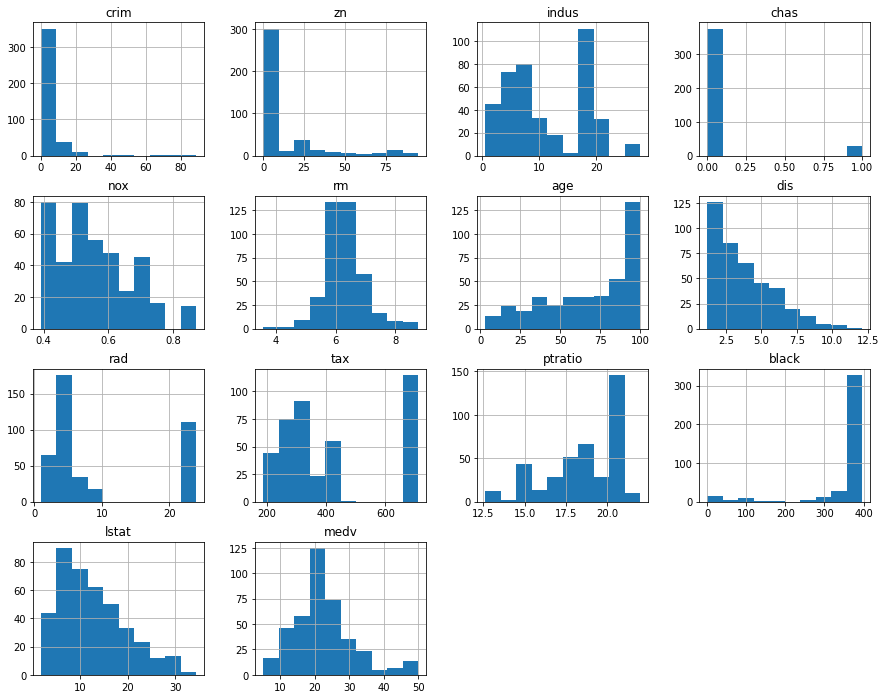

In [5]:
houses.hist(figsize=(15,12))
#I already see tat the data is skewed and the units are mixed

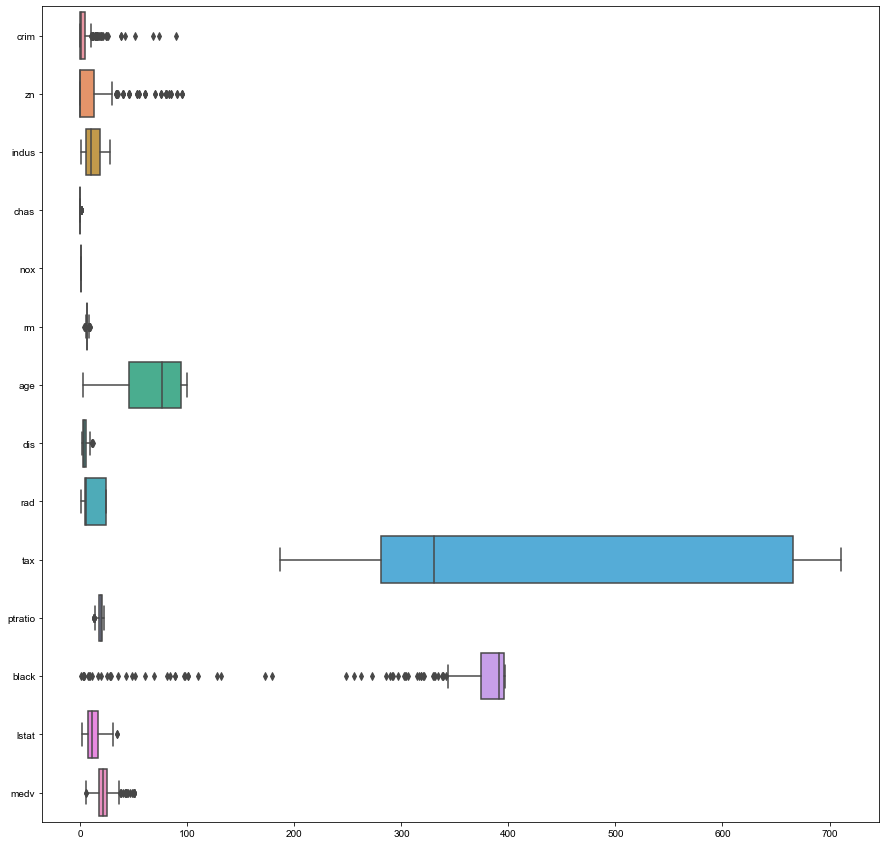

In [6]:
#checking outliers

f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=houses,whis=1.5,orient="h")
#From this graph I see many categories with what it seem to be outliers
#some with just higher scales not letting me to spot the outliers cprrectly
#Let's try to separate the data
#mixture of units

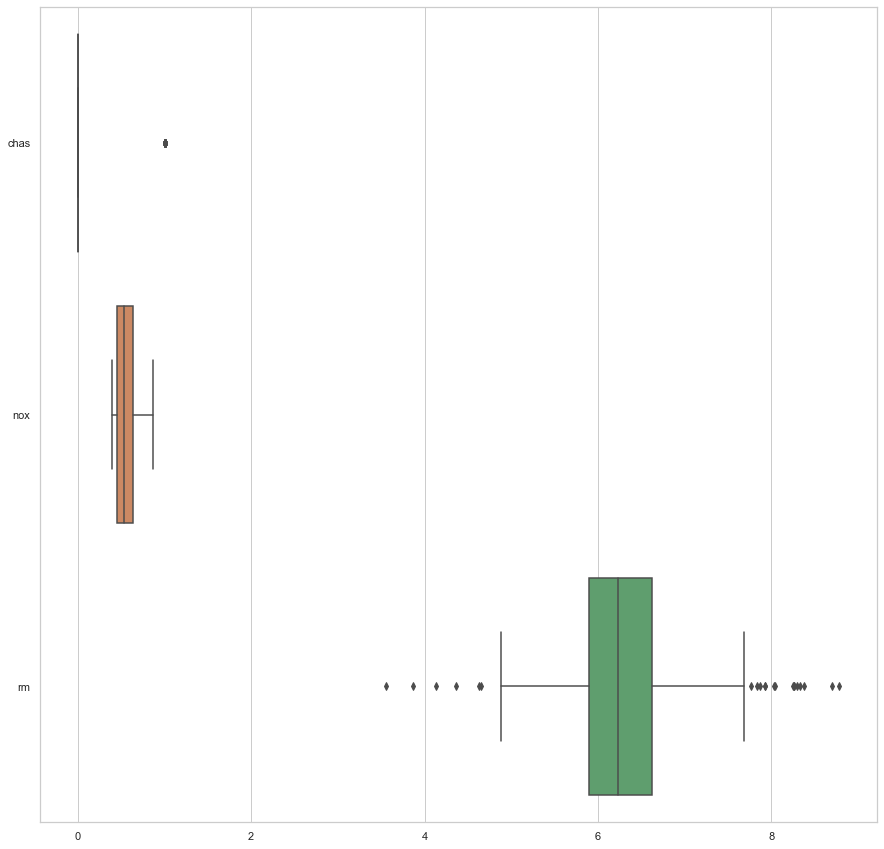

In [7]:
f, ax = plt.subplots(figsize=(15, 15))
ax1 = sns.boxplot(data=houses[['chas','nox','rm']],whis=1.5,orient="h")

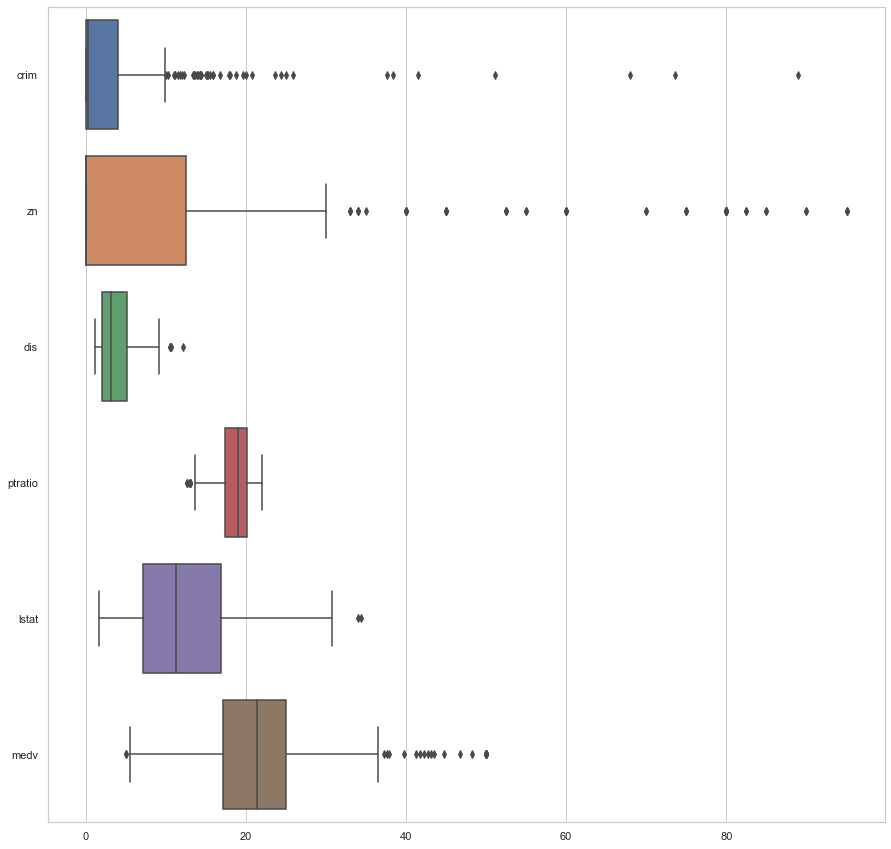

In [8]:
other = houses[['tax','age','indus','rad']]
f, ax = plt.subplots(figsize=(15, 15))
ax2 = sns.boxplot(data=houses.drop(['tax','age','indus','rad','black','chas','nox','rm'], axis=1),whis=1.5,orient="h")

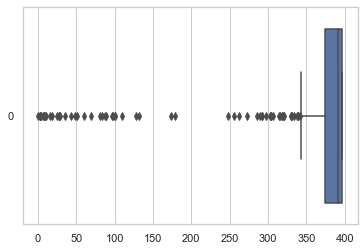

In [9]:
ax3 = sns.boxplot(data=houses.black,whis=1.5,orient="h")

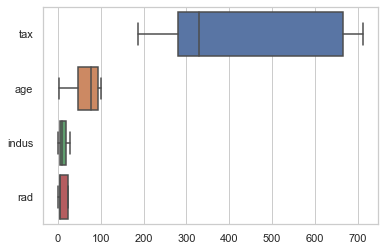

In [10]:
ax4 = sns.boxplot(data=other,whis=1.5,orient="h")

In [11]:
# exploring this way to clean for outliers

# from scipy import stats
# z_scores = stats.zscore(houses)
# z = np.abs(z_scores)
# new_houses = houses[(z < 3).all(axis=1)]
# print(f'shape: {new_houses.shape}')
# print(f'data loss due to removal of outliers :{round((houses.shape[0]-new_houses.shape[0])/houses.shape[0]*100,2)}%')

# #Cleaning all outliers has quite an impact on the data!! which makes me think that
# it is perhaps not a good idea...

#After discussing with my colleages I came to realize that the rows are suburbs and cities, so eliminating them
# will be worse (hence, the data loss previously noticed (more than 20%!))

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [12]:
# Your plots here
house_corr = houses.corr()


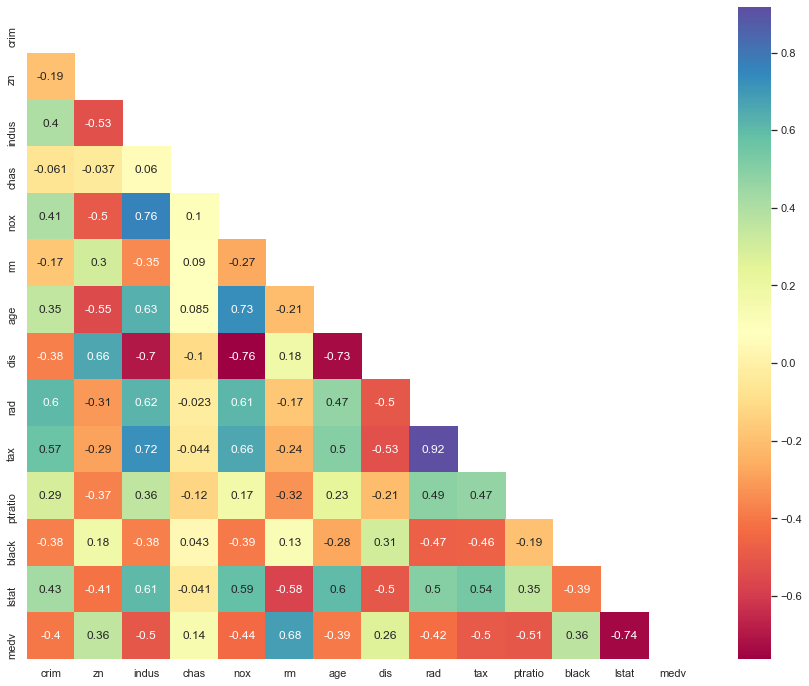

In [13]:
mask = np.triu(np.ones_like(house_corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(house_corr, cmap ='Spectral',mask=mask, annot=True)
plt.show()
#From this I see: medv is strongly correlated with rm and Istat and indus/ptratio

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

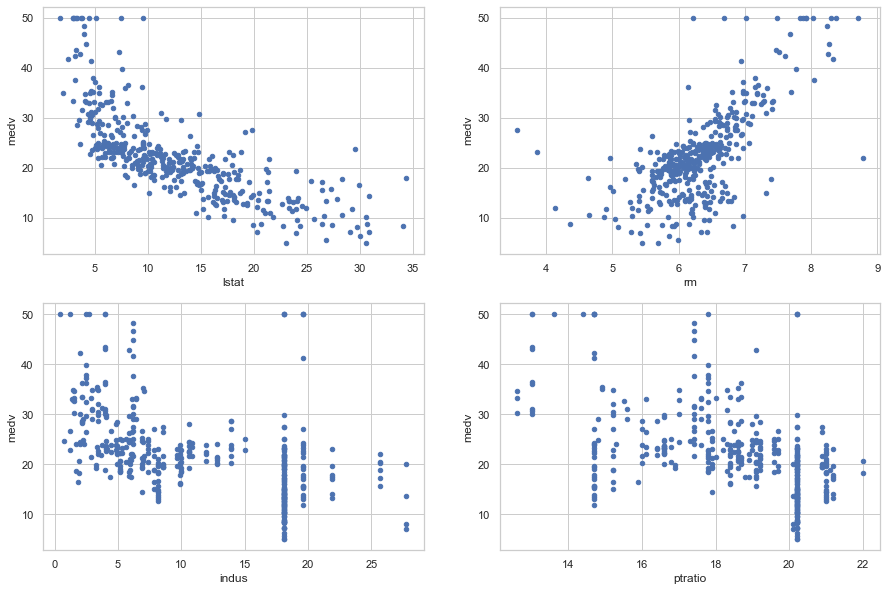

In [14]:
f, ax = plt.subplots(2,2,figsize=(15, 10))

ax1 = houses.plot.scatter(x='lstat', y='medv', cmap='viridis_r',ax=ax[0,0])
ax2 = houses.plot.scatter(x='rm', y='medv', cmap='viridis_r',ax=ax[0,1])
ax3 = houses.plot.scatter(x='indus', y='medv', cmap='viridis_r',ax=ax[1,0])
ax4 = houses.plot.scatter(x='ptratio', y='medv', cmap='viridis_r',ax=ax[1,1])

#this doesn't show reg line



<AxesSubplot:xlabel='ptratio', ylabel='medv'>

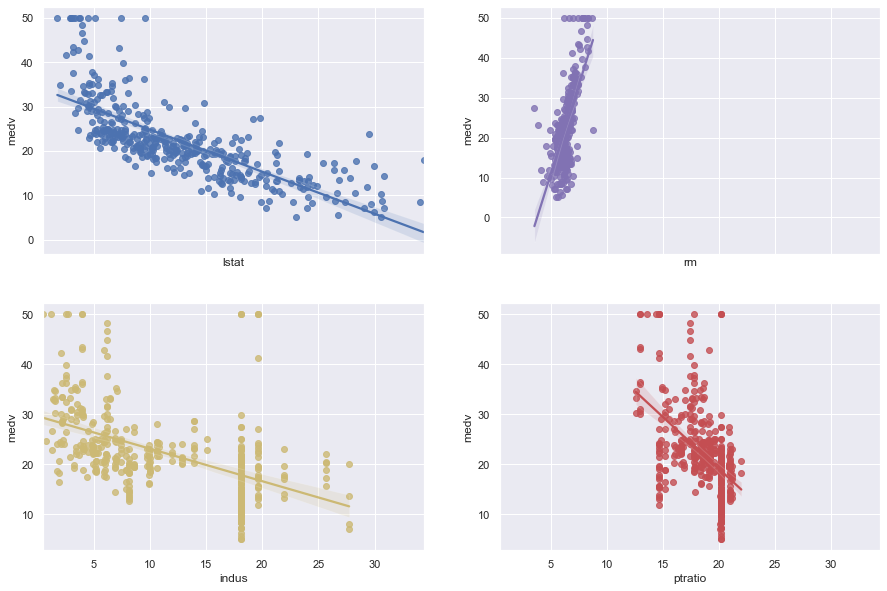

In [15]:
#with help from my colleagues:

sns.set_theme(color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.regplot(x=houses['lstat'], y=houses['medv'], color="b",ax=axes[0,0])
sns.regplot(x=houses['rm'], y=houses['medv'], color="m",ax=axes[0,1])
sns.regplot(x=houses['indus'], y=houses['medv'], color="y",ax=axes[1,0])
sns.regplot(x=houses['ptratio'], y=houses['medv'], color="r",ax=axes[1,1])


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

# Your response here
so before analysing this let's see what the columns mean:

`mdev` :Median value of owner-occupied homes in $1000s

`indus` : proportion of non-retail business acres per town
the higher the non-retail business per town, the lower the median value

`ptratio` : pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of afro-american by town 13. LSTAT: % lower status of the population
the bigger the ration of pupil students, the lowe the Median value (don't really understand this one)

`rm` : average number of rooms per dwelling
the bigger the number of rooms, the higher the median value = expected, i suppose



### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

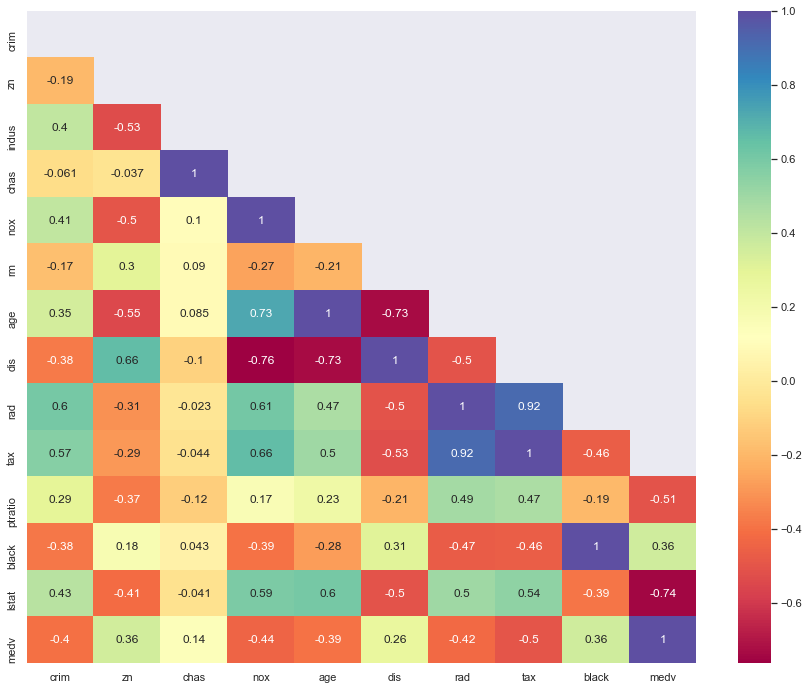

In [16]:
# Your response here
#yes
rest_corr = house_corr[['crim','zn','chas','nox','age','dis','rad','tax','black','medv']]
mask = np.triu(np.ones_like(rest_corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(rest_corr, cmap ='Spectral',mask=mask, annot=True)
plt.show()
#age-nox
#rad-tax
#tax-nox
#dis-zn

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [21]:
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [61]:
# Your code here

from sklearn.model_selection import train_test_split

y = houses['medv']
X = houses.drop('medv', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(81,)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [62]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

score_train=[]
score_test=[]
for i in range(2,12,2):
    model = RandomForestRegressor(max_depth=i).fit(X_train, y_train)
    #max depth cannot be 0
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))
    print(f'for max_depth: {i}\nthe train scores are:\n {score_train}\nThe test scores are:\n {score_test}')

for max_depth: 2
the train scores are:
 [0.7803590989030317]
The test scores are:
 [0.5979811623323663]
for max_depth: 4
the train scores are:
 [0.7803590989030317, 0.9225307055330751]
The test scores are:
 [0.5979811623323663, 0.6661186002222187]
for max_depth: 6
the train scores are:
 [0.7803590989030317, 0.9225307055330751, 0.9575274676683253]
The test scores are:
 [0.5979811623323663, 0.6661186002222187, 0.6972663831803652]
for max_depth: 8
the train scores are:
 [0.7803590989030317, 0.9225307055330751, 0.9575274676683253, 0.9699452879976687]
The test scores are:
 [0.5979811623323663, 0.6661186002222187, 0.6972663831803652, 0.7189151251009464]
for max_depth: 10
the train scores are:
 [0.7803590989030317, 0.9225307055330751, 0.9575274676683253, 0.9699452879976687, 0.9772819883618519]
The test scores are:
 [0.5979811623323663, 0.6661186002222187, 0.6972663831803652, 0.7189151251009464, 0.7196664256655261]


Now, plot the score for each tree on the training set and on the testing set.

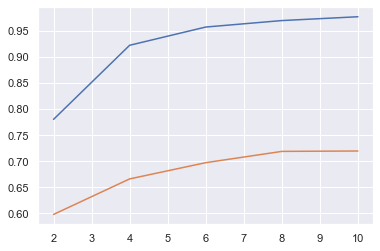

In [63]:
# Produce a plot with the score for the testing and training for the different max depths
x = range(2,12,2)
plt.plot(x,score_train)
plt.plot(x,score_test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [64]:
# Your response here
#The score increases with the depth, until a certain moment...

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [65]:
# Your response here
model = RandomForestRegressor(max_depth=1).fit(X_train, y_train)

print(f'train score for 1 : {model.score(X_train,y_train)}, \ntest score {model.score(X_test,y_test)}') 
#the score is lower than the one for depth 2 
#I believe that when trained with max depth of 1 is high bias, and high variance for max 10

train score for 1 : 0.6093319701757182, 
test score 0.41705151169420374


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [76]:
# Your response here
#so, first I tried the score for 9 but the score seems too high on the train data
#(97) vs a score of 73 in test data.
# the 'elbow' before 8 is 6, but I see that the model (train and test scores) 
#go higher after this point so I will try 8 =97 vs. 73
#max depth =7 (96 vs. 72)
# for me these results for different max depth seem quite close, so I am very confused 
#when it comes to decide the max depth to be used. I would chose 8 bcause as from that 
#point, the test scores do not improve
#Ok, I have some issue swith the data due to the random factor, I will go back and add a random_state
model = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
print(f'train score for 8 : {model.score(X_train,y_train)}, \ntest score {model.score(X_test,y_test)}') 

train score for 8 : 0.9727930485032923, 
test score 0.7354793654875824


In [57]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_test)
mean_squared_error(y_test, y_pred)

26.94683911923042

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here